In [19]:
library(tidyverse)
library(ggcorrplot)
library(GGally)
library(janitor)
library(caret)
library(Hmisc)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)


Attaching package: ‘janitor’

The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



In [7]:
df <- read_csv("../data/train.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Team = col_character(),
  DisplayName = col_character(),
  GameClock = col_time(format = ""),
  PossessionTeam = col_character(),
  FieldPosition = col_character(),
  OffenseFormation = col_character(),
  OffensePersonnel = col_character(),
  DefensePersonnel = col_character(),
  PlayDirection = col_character(),
  TimeHandoff = col_datetime(format = ""),
  TimeSnap = col_datetime(format = ""),
  PlayerHeight = col_character(),
  PlayerBirthDate = col_character(),
  PlayerCollegeName = col_character(),
  Position = col_character(),
  HomeTeamAbbr = col_character(),
  VisitorTeamAbbr = col_character(),
  Stadium = col_character(),
  Location = col_character(),
  StadiumType = col_character()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“16500 parsing failures.
  row       col expected actual                file
47983 WindSpeed a double    SSW '../data/train.csv'
47984 Wind

In [8]:
str(df)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	509762 obs. of  49 variables:
 $ GameId                : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ PlayId                : num  2.02e+13 2.02e+13 2.02e+13 2.02e+13 2.02e+13 ...
 $ Team                  : chr  "away" "away" "away" "away" ...
 $ X                     : num  73.9 74.7 74 71.5 69.3 ...
 $ Y                     : num  34.8 32.6 33.2 27.7 35.4 ...
 $ S                     : num  1.69 0.42 1.22 0.42 1.82 1.01 1.11 1.24 0.26 4.55 ...
 $ A                     : num  1.13 1.35 0.59 0.54 2.43 0.32 0.83 0.74 1.86 0.76 ...
 $ Dis                   : num  0.4 0.01 0.31 0.02 0.16 0.18 0.02 0.13 0.28 0.51 ...
 $ Orientation           : num  81.99 27.61 3.01 359.77 12.63 ...
 $ Dir                   : num  177 199 203 106 164 ...
 $ NflId                 : num  496723 2495116 2495493 2506353 2530794 ...
 $ DisplayName           : chr  "Eric Berry" "Allen Bailey" "Justin Houston" "Derrick Johnson" ...
 $ JerseyNumbe

Explore who is rushing the ball

In [15]:
df %>%
    filter(NflIdRusher == NflId) %>% # only keep players whom actually were doing the rushing
    group_by(NflIdRusher, DisplayName, Season) %>%
    summarise(Yards = sum(Yards)) %>%
    arrange(desc(Yards)) %>%
    head(10)

NflIdRusher,DisplayName,Season,Yards
<dbl>,<chr>,<dbl>,<dbl>
2555224,Ezekiel Elliott,2018,1413
2560968,Saquon Barkley,2018,1307
2557917,Kareem Hunt,2017,1304
2552475,Todd Gurley,2017,1264
2552475,Todd Gurley,2018,1251
2540175,Le'Veon Bell,2017,1245
2557976,Joe Mixon,2018,1168
2558865,Chris Carson,2018,1151
79607,LeSean McCoy,2017,1138


Simple data frame that contains only one row for each play

In [10]:
df_tidy <- df %>%
    filter(NflIdRusher == NflId) %>% # keep only one record per play
    select(GameId, PlayId, Team, Season, YardLine, Quarter, 
           PossessionTeam, Down, Distance, FieldPosition, HomeScoreBeforePlay,
           VisitorScoreBeforePlay, NflIdRusher, OffenseFormation, OffensePersonnel,
           DefendersInTheBox, PlayDirection, TimeHandoff, TimeSnap, HomeTeamAbbr,
           VisitorTeamAbbr, Week, Stadium, Location, StadiumType, Turf, GameWeather,
           Temperature, Humidity, WindSpeed, WindDirection,
           Yards)

## Exploratory Plots

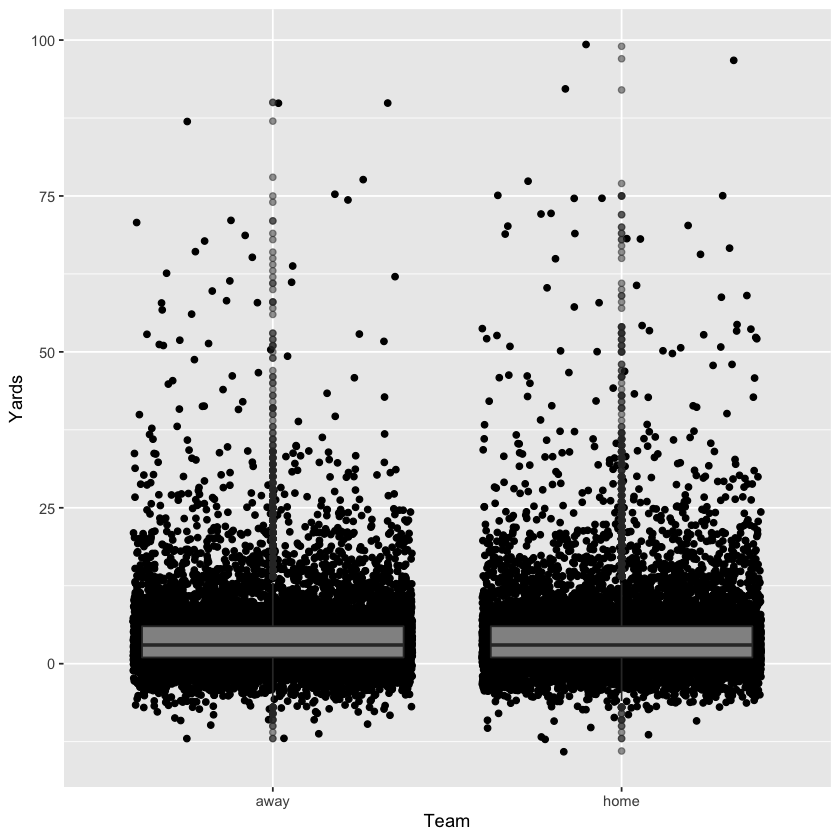

In [29]:
# Team
df_tidy %>%
    ggplot(aes(x = Team, y = Yards)) +
        geom_jitter() +
        geom_boxplot(alpha = 0.5)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


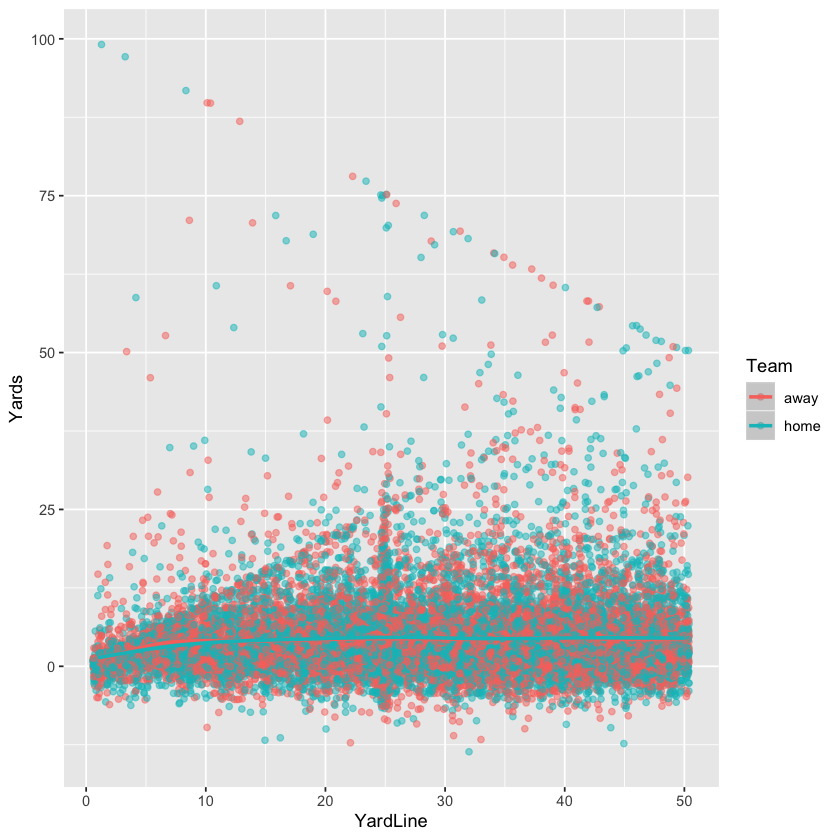

In [31]:
# YardLine
df_tidy %>%
    ggplot(aes(x = YardLine, y = Yards, color = Team)) +
        geom_jitter(alpha = 0.5) + 
        geom_smooth()

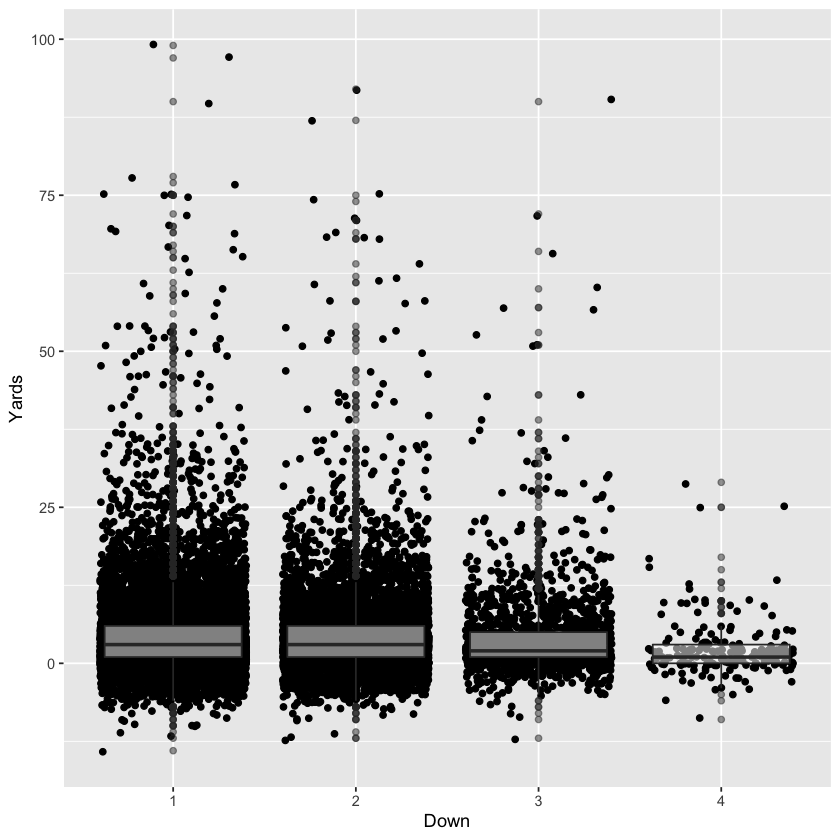

In [32]:
# Down
df_tidy %>%
    mutate(Down = as.factor(Down)) %>%
    ggplot(aes(x = Down, y = Yards)) +
        geom_jitter() +
        geom_boxplot(alpha = 0.5)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


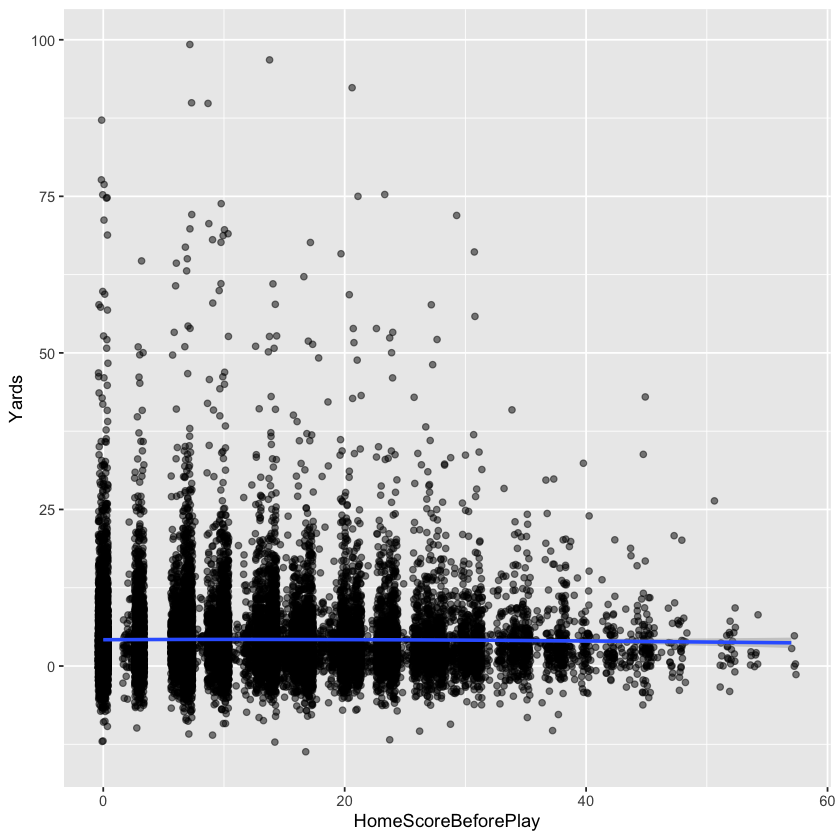

In [33]:
# HomeScoreBeforePlay
df_tidy %>%
    ggplot(aes(x = HomeScoreBeforePlay, y = Yards)) +
        geom_jitter(alpha = 0.5) +
        geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


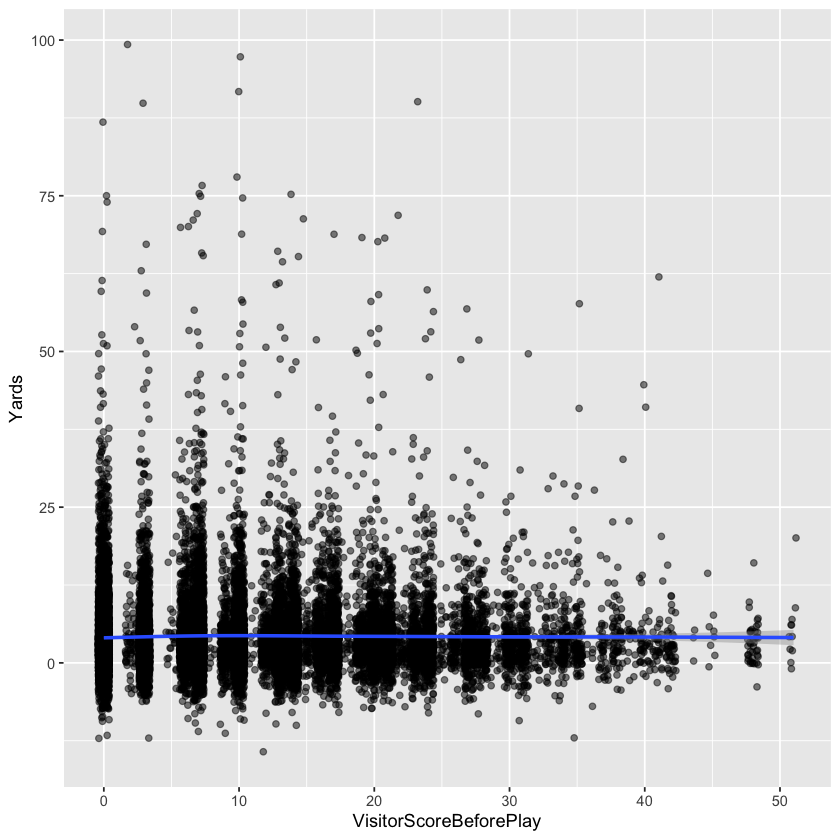

In [34]:
# VisitorScoreBeforePlay
df_tidy %>%
    ggplot(aes(x = VisitorScoreBeforePlay, y = Yards)) +
        geom_jitter(alpha = 0.5) +
        geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


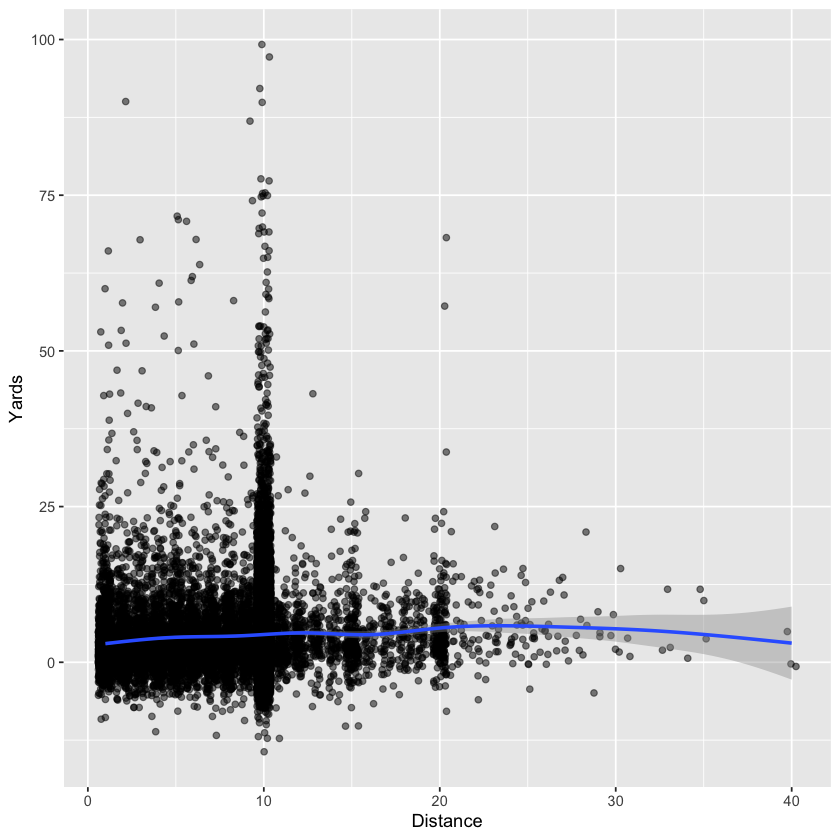

In [35]:
# Down
df_tidy %>%
    ggplot(aes(x = Distance, y = Yards)) +
        geom_jitter(alpha = 0.5) + 
        geom_smooth()

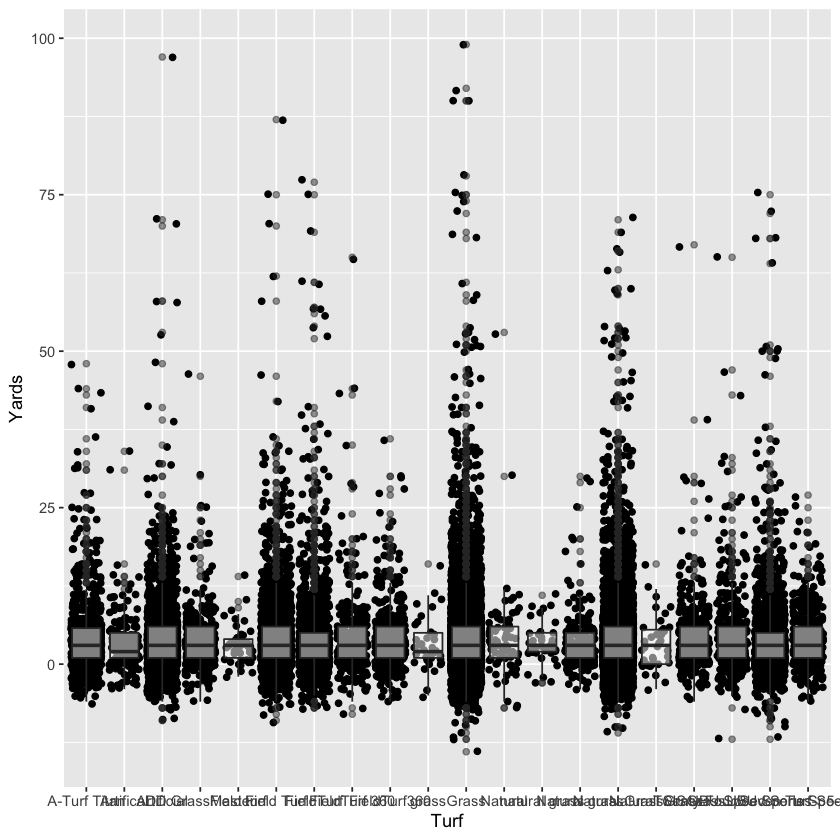

In [17]:
# Turf
df_tidy %>%
    mutate(Turf = as.factor(Turf)) %>%
    ggplot(aes(x = Turf, y = Yards)) +
        geom_jitter() +
        geom_boxplot(alpha = 0.5)

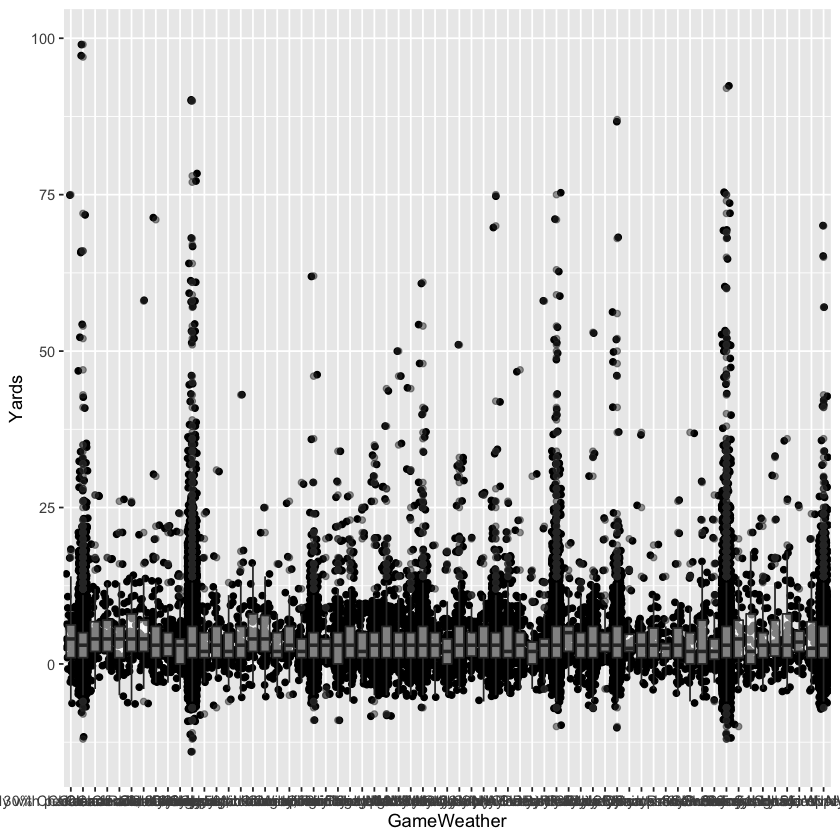

In [18]:
# GameWeather
df_tidy %>%
    mutate(GameWeather = as.factor(GameWeather)) %>%
    ggplot(aes(x = GameWeather, y = Yards)) +
        geom_jitter() +
        geom_boxplot(alpha = 0.5)

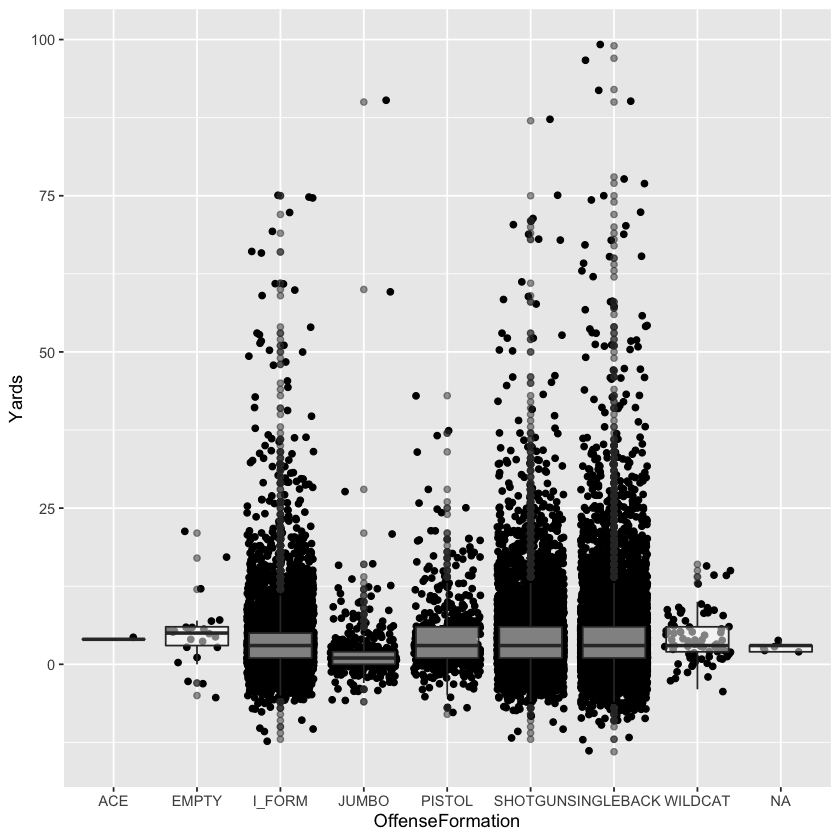

In [23]:
# Formation
df_tidy %>%
    mutate(OffenseFormation = as.factor(OffenseFormation)) %>%
    ggplot(aes(x = OffenseFormation, y = Yards)) +
        geom_jitter() +
        geom_boxplot(alpha = 0.5)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


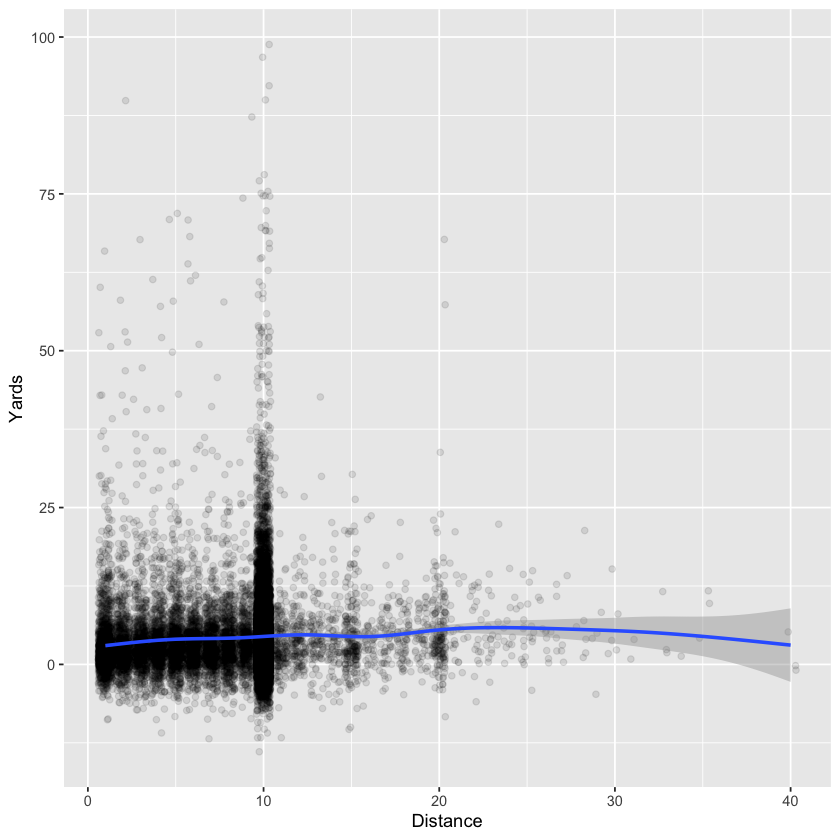

In [37]:
df_tidy %>%
    ggplot(aes(x = Distance, y = Yards)) +
        geom_jitter(alpha = 0.1) +
        geom_smooth()

In [40]:
tabyl(df_tidy$PlayDirection)

df_tidy$PlayDirection,n,percent
<chr>,<dbl>,<dbl>
left,11657,0.5030858
right,11514,0.4969142


## Standardizing Field Directions

https://www.kaggle.com/statsbymichaellopez/nfl-tracking-wrangling-voronoi-and-sonars

In [72]:
# select some sample plays to work with
sample_plays <- df$PlayId %>% unique() %>% sample(20)
sample_plays 

[1] 2.017101e+13 2.017121e+13 2.017102e+13 2.018093e+13 2.018112e+13
 [6] 2.018110e+13 2.018112e+13 2.017111e+13 2.018121e+13 2.018092e+13
[11] 2.017092e+13 2.017122e+13 2.018092e+13 2.018101e+13 2.017092e+13
[16] 2.017092e+13 2.018113e+13 2.017111e+13 2.018122e+13 2.017122e+13

In [79]:
df %>% filter(PlayId == sample_plays[1]) %>% head()

GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2017100805,2.017101e+13,away,36.89,29.25,1.60,1.18,0.17,87.98,141.57,2495677,Brandon Mebane,92,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,6-1,311,01/15/1985,California,NT,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW
2017100805,2.017101e+13,away,40.96,44.90,1.91,2.35,0.17,129.62,175.86,2532861,Casey Hayward,26,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,5-11,192,09/09/1989,Vanderbilt,CB,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW
2017100805,2.017101e+13,away,33.82,24.54,2.09,1.99,0.24,213.43,299.03,2532870,Melvin Ingram,54,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,6-2,247,04/26/1989,South Carolina,DE,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW
2017100805,2.017101e+13,away,41.73,40.24,1.95,1.81,0.19,115.76,195.22,2541958,Jahleel Addae,37,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,5-10,195,01/24/1990,Central Michigan,SS,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW
2017100805,2.017101e+13,away,52.12,26.28,0.31,1.78,0.11,179.75,127.15,2543830,Tre Boston,33,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,6-1,205,06/25/1992,North Carolina,FS,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW
2017100805,2.017101e+13,away,36.78,21.88,1.97,1.01,0.51,187.99,172.65,2552296,Kyle Emanuel,51,2017,26,3,10:05:00,NYG,2,4,NYG,9,10,2550481,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-08 19:08:52,2017-10-08 19:08:51,6,6-3,250,08/16/1991,North Dakota State,OLB,NYG,LAC,5,MetLife Stadium,"East Rutherford, NJ",NA,UBU Speed Series-S5-M,Cloudy,76,90,7,WSW


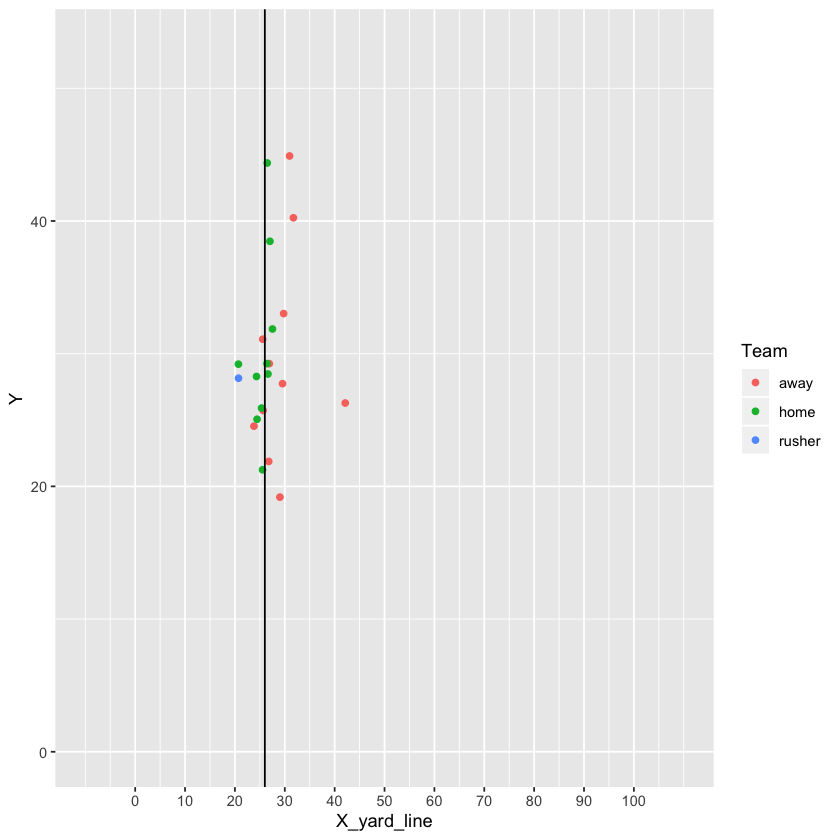

In [77]:
# clean data
df_clean <- df %>%
    mutate(X_yard_line = X - 10,
           sid_of_play = ifelse(PossessionTeam == )
           plot_color = ifelse(NflId == NflIdRusher, "rusher", Team)) %>%



line_of_scrimmage <- min(df %>% filter(PlayId == sample_plays[1]) %>% select(YardLine) %>% pull)

df %>%
    mutate(X_yard_line = X - 10,
           plot_color = ifelse(NflId == NflIdRusher, "rusher", Team)) %>%
    filter(PlayId == sample_plays[1]) %>%
    ggplot(aes(x = X_yard_line, y = Y, color = plot_color)) +
        geom_point() + 
        geom_vline(xintercept = line_of_scrimmage) +
        scale_x_continuous(breaks = c(0:10)*10, limits = c(-10,110)) +
        scale_y_continuous(limits = c(0,53.3))
        